## SVM

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from cvxopt import solvers
from cvxopt import matrix

In [112]:
X1=np.array([[3,4],[2,3], [7.5,12.5]])
X2=np.array([[10,10], [11,11], [15,15]])

In [113]:
X=np.concatenate((X1,X2), axis=0)

In [114]:
X

array([[  3. ,   4. ],
       [  2. ,   3. ],
       [  7.5,  12.5],
       [ 10. ,  10. ],
       [ 11. ,  11. ],
       [ 15. ,  15. ]])

In [115]:
X.shape

(6, 2)

In [118]:
Y1=np.concatenate((np.ones((X1.shape[0],1)),X1), axis=1)
Y2=np.concatenate((np.ones((X2.shape[0],1))*-1,-X2), axis=1)

In [122]:
Y1

array([[  1. ,   3. ,   4. ],
       [  1. ,   2. ,   3. ],
       [  1. ,   7.5,  12.5]])

In [121]:
Y2

array([[ -1., -10., -10.],
       [ -1., -11., -11.],
       [ -1., -15., -15.]])

In [123]:
A=matrix(np.concatenate((Y1,Y2), axis=0),tc='d')
A

<6x3 matrix, tc='d'>

In [124]:
b=matrix(-1*np.ones((A.size[0],1)),tc='d')
b

<6x1 matrix, tc='d'>

In [125]:
q1=np.zeros((1,A.size[1]))
q1

array([[ 0.,  0.,  0.]])

In [126]:
Q2=np.concatenate((np.zeros((X.shape[1],1)), np.eye(X.shape[1])),axis=1)
Q2

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [127]:
Q=np.concatenate((q1,Q2),axis=0)

In [128]:
Q

array([[ 0.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [129]:
Q=matrix(2*Q,tc='d')
Q

<3x3 matrix, tc='d'>

In [130]:
q=matrix(np.zeros((A.size[1],1)),tc='d')
q

<3x1 matrix, tc='d'>

In [131]:
sol=solvers.qp(Q,q,A,b)

     pcost       dcost       gap    pres   dres
 0:  1.6262e-01  1.7799e+00  1e+01  1e+00  4e+01
 1:  8.7172e-01 -3.1753e-01  1e+00  7e-02  2e+00
 2:  4.4058e-01  3.0310e-01  1e-01  1e-15  5e-15
 3:  3.5724e-01  3.4003e-01  2e-02  5e-16  2e-14
 4:  3.5049e-01  3.5014e-01  3e-04  4e-16  1e-14
 5:  3.5030e-01  3.5029e-01  3e-06  6e-16  1e-14
 6:  3.5030e-01  3.5030e-01  3e-08  4e-16  1e-14
Optimal solution found.


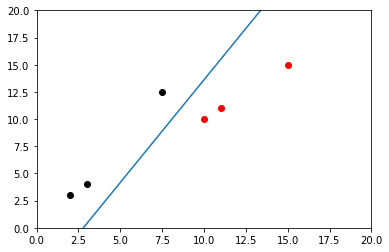

In [133]:
a_con=sol['x']
x=np.arange(0,100,15)
y=-(a_con[0]+a_con[1]*x)/a_con[2]
axes = plt.gca()
axes.set_xlim([0,20])
axes.set_ylim([0,20])
plt.scatter(X[[0,1,2],0], X[[0,1,2],1], color='k')
plt.scatter(X[[3,4,5],0], X[[3,4,5],1], color='r')
plt.plot(x,y)
plt.show()